# Calgary Rainfall Study - Personal Project
Author: Gustavo Bravo

Dataset: Historical Rainfall - data.calgary.ca - https://data.calgary.ca/Environment/Historical-Rainfall/d9kv-swk3

Data use license: https://data.calgary.ca/stories/s/Open-Calgary-Terms-of-Use/u45n-7awa

Have the weather patterns changed throughout the years in the city of Calgary? If so, how have these affected floods, forest fire rates, and other natural disasters?

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

In [135]:
df = pd.read_csv("Historical_Rainfall.csv")
plt.style.use("seaborn-dark")
plt.rcParams.update({"font.size": 15})

First, to get a feel for how it rains differently in each part of the city, I want to analyze the last 5 years of rain per location

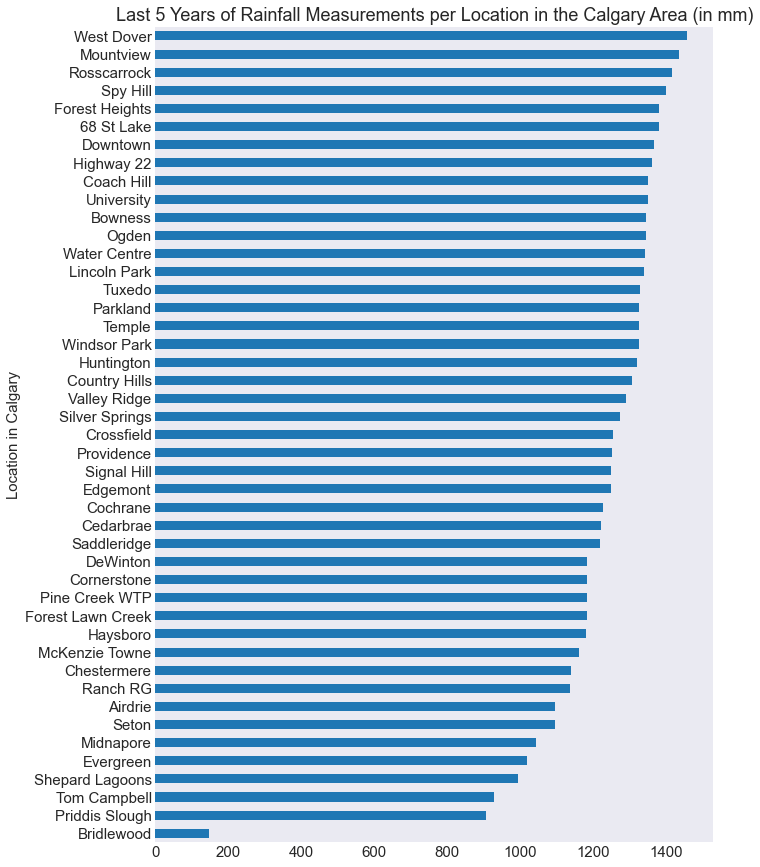

<Figure size 432x288 with 0 Axes>

In [136]:
# Rainfaill 2016-2021
last_five_years_df = df.loc[(df["YEAR"] > 2016) & (df["YEAR"] < 2022)]

# By location in calgary
plt.figure(figsize = (10, 15))

last_five_years_df.groupby("NAME")["RAINFALL"].sum().sort_values().plot(
    kind = "barh",
    title = "Last 5 Years of Rainfall Measurements per Location in the Calgary Area (in mm)",
    xlabel = "Location in Calgary"
)
plt.show()
plt.clf()

Looks like there are certainly parts of the city that get more rain than others, I want to look at these based on their quadrant of the city (NW, SE, etc.) Here, we will be removing Downtown, Hungtington Hills (as it is split in the middle of east and west), Crossfield, Airdrie, Dewinton, Chestermere, Priddis, Ranch RG, and Cochrane  and looking at them separately

In [137]:
# Create a dictionary containing the location as values and its ordinal directions as keys
# Downtown, Hungtington Hills(as it is split in the middle of east and west) crossfield, airdrie, dewinton, chestermere, priddis, Ranch RG, and cochrane 
# are their own categories
ordinal_calgary_dict = {
    "Spy Hill": "NW",
    "University": "NW",
    "Bowness": "NW",
    "Country Hills": "NW",
    "Valley Ridge": "NW",
    "Silver Springs": "NW",
    "Edgemont": "NW",
    "Rosscarrock": "SW",
    "Highway 22": "SW",
    "Coach Hill": "SW",
    "Lincoln Park": "SW",
    "Windsor Park": "SW",
    "Providence": "SW",
    "Signal Hill": "SW",
    "Cedarbrae": "SW",
    "Haysboro": "SW",
    "Evergreen": "SW",
    "Bridlewood": "SW",
    "West Dover": "SE", 
    "Forest Lawn Creek": "SE", 
    "Forest Heights": "SE",
    "Parkland": "SE", 
    "Water Centre": "SE", 
    "68 St Lake": "SE", 
    "Ogden": "SE",
    "Parkland": "SE",
    "Pine Creek WTP": "SE",
    "Ernest Morrow": "SE",
    "McKenzie Towne": "SE",
    "Seton": "SE",
    "Midnapore": "SE",
    "Shepard Lagoons": "SE",
    "Mountview": "NE", 
    "Tuxedo": "NE",
    "Temple": "NE",
    "Saddleridge": "NE",
    "Cornerstone": "NE",
    "Tom Campbell": "NE"
}

df["ORDINAL_DIRECTION"] = df["NAME"].map(ordinal_calgary_dict).fillna("Other")
df.dropna()

,CHANNEL,NAME,YEAR,TIMESTAMP,RAINFALL,ID,ORDINAL_DIRECTION
0,44,Forest Lawn Creek,2021,2021/05/01 02:40:00 PM,0.2,2021-05-01T14:40:00-44,SE
1,48,Seton,2021,2021/05/01 03:35:00 PM,0.2,2021-05-01T15:35:00-48,SE
2,17,Windsor Park,2021,2021/05/01 03:40:00 PM,0.2,2021-05-01T15:40:00-17,SW
3,17,Windsor Park,2021,2021/05/01 03:45:00 PM,0.2,2021-05-01T15:45:00-17,SW
4,18,Cedarbrae,2021,2021/05/01 03:45:00 PM,0.2,2021-05-01T15:45:00-18,SW
...,...,...,...,...,...,...,...
962658,2,Silver Springs,2020,2020/09/30 05:45:00 AM,0.2,2020-09-30T05:45:00-02,NW
962659,3,Edgemont,2020,2020/09/30 05:45:00 AM,0.2,2020-09-30T05:45:00-03,NW
962660,1,Spy Hill,2020,2020/09/30 05:50:00 AM,0.2,2020-09-30T05:50:00-01,NW
962661,5,University,2020,2020/09/30 05:55:00 AM,0.2,2020-09-30T05:55:00-05,NW


Plot the last 50 years of data based off its quadrant in the city

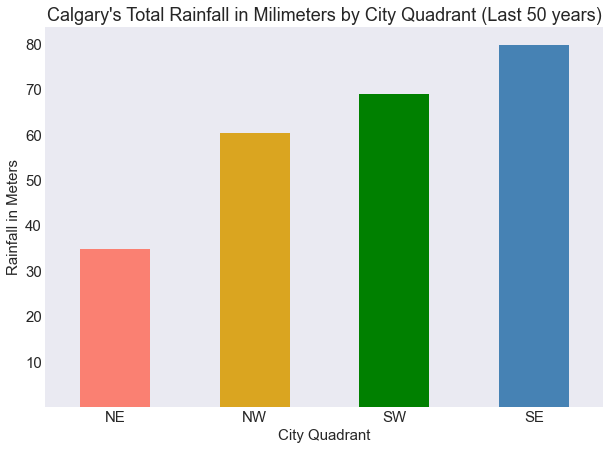

In [143]:
plt.figure(figsize = (10, 7))
last_50_years_rainfall = df[(df["YEAR"] > 1971) & (df["YEAR"] < 2022) & (df["ORDINAL_DIRECTION"] != "Other")]
last_50_years_rainfall.groupby("ORDINAL_DIRECTION")["RAINFALL"].sum().sort_values().plot(
    kind = "bar",
    title = "Calgary's Total Rainfall in Milimeters by City Quadrant (Last 50 years)",
    xlabel = "City Quadrant",
    ylabel = "Rainfall in Meters",
    rot = "0",
    color = ["salmon", "goldenrod", "green", "steelblue"]
)
plt.yticks([10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000],[10, 20, 30, 40, 50, 60, 70, 80])
plt.show()

Conclusively, in the last 50 years, the majority of Calgary's rainfall occurs in the southern regions, with the North East being the driest quadrant in the city.

This data made by skewed by the number of collection centers that exist in the southern regions, so keep that in mind